---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    fraud = df.loc[df['Class'] == 1]
    
    return fraud.size/df.size

answer_one()


0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_prediction = dummy.predict(X_test)
    
    accuracy = dummy.score(X_test, y_test)
    dummy_recall = recall_score(y_test, y_dummy_prediction)
    
    return (accuracy, dummy_recall)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_prediction = svm.predict(X_test)
    
    accuracy = svm.score(X_test, y_test)
    svm_recall = recall_score(y_test, svm_prediction)
    svm_precision = precision_score(y_test, svm_prediction)
    
    return (accuracy, svm_recall,svm_precision)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    param = {'C': 1e9, 'gamma': 1e-07}

    svm = SVC(C = param['C'], gamma = param['gamma']).fit(X_train, y_train)
    svm_prediction = svm.predict(X_test)
    
    deci_score = svm.decision_function(X_test)
    
#     new_prediction = np.zeros(len(deci_score))
    
    deci_df = np.vstack((svm_prediction, deci_score)).T
    for r in deci_df:
        if r[1] > -220:
            r[0] = 1
        else:
            r[0] = 0
            
    new_prediction = deci_df[:,0]
    
#     p_predict = deci_score[deci_score > -220]
#     n_predict = deci_score[deci_score < -220]
    
    confusion = confusion_matrix(y_test, new_prediction)
    
    return confusion

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


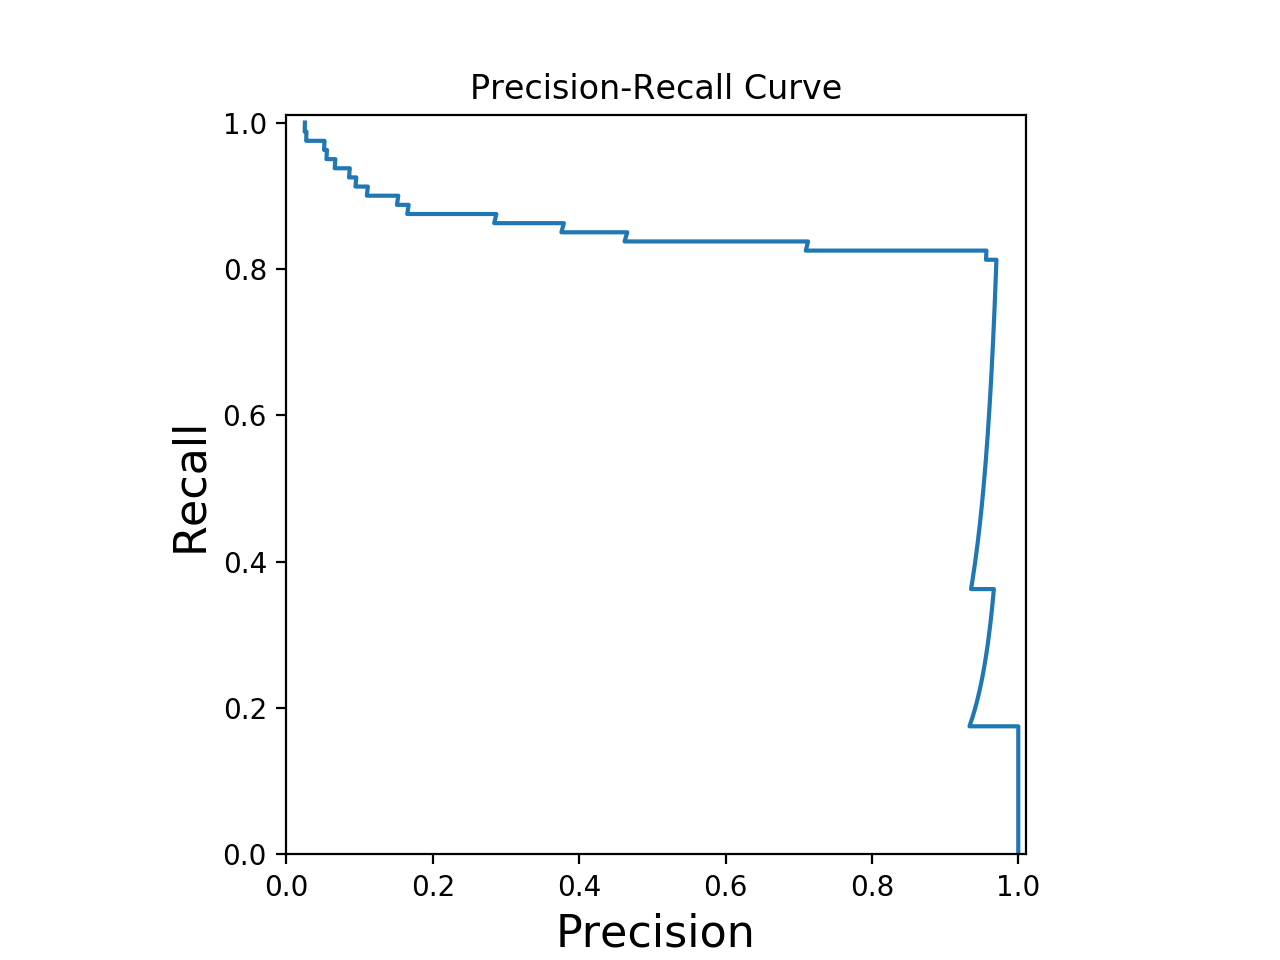

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<IPython.core.display.Javascript object>


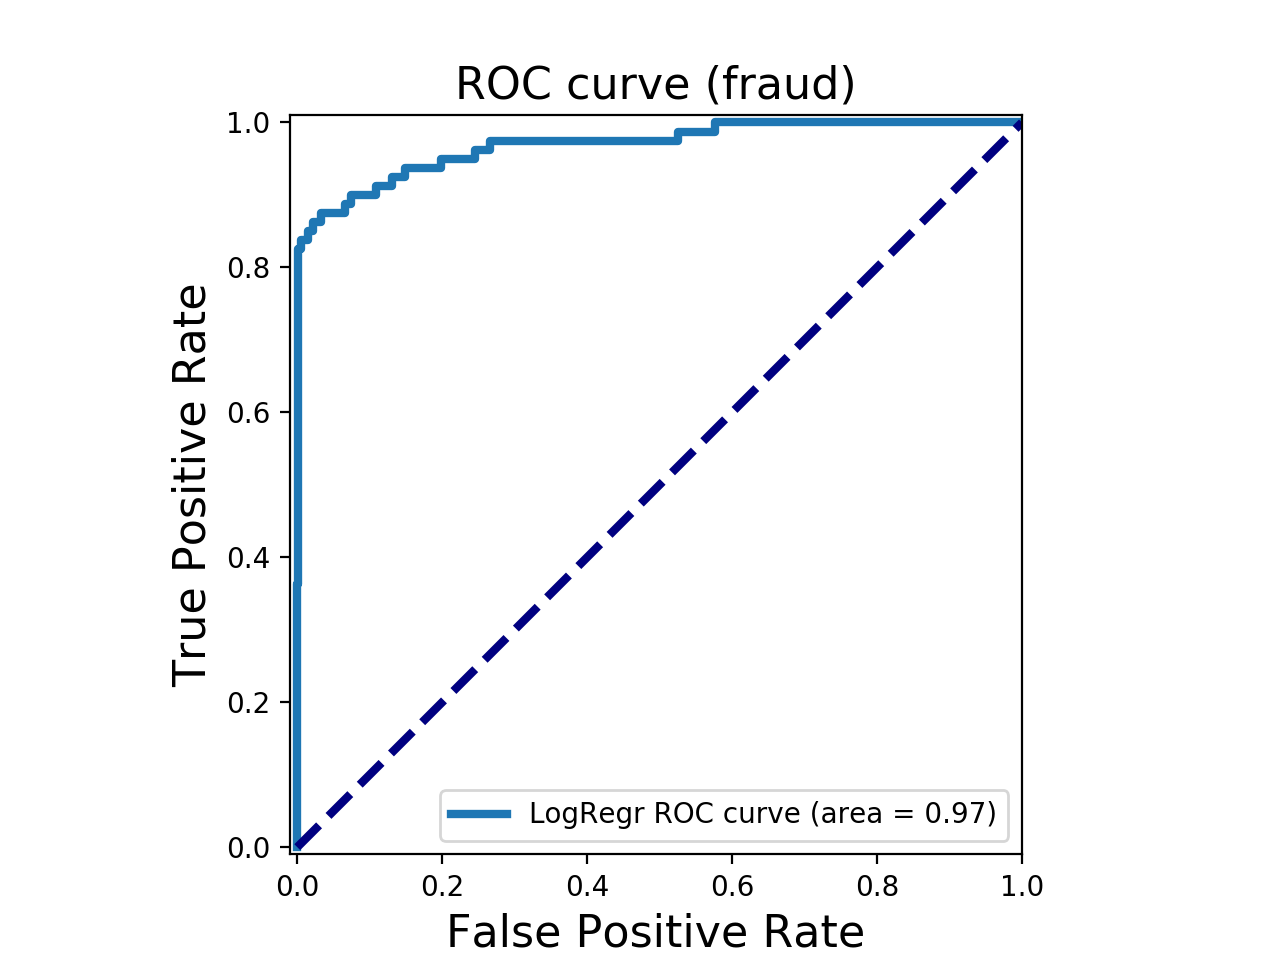

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(0.825, 0.9)

In [10]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
#     import matplotlib.pyplot as plt
#     %matplotlib notebook
    
    lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

    y_proba_score = lr.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_score)
    
    recall_value = recall[np.where(precision == 0.75)[0]][0]

#     plt.figure()
#     plt.xlim([0.0, 1.01])
#     plt.ylim([0.0, 1.01])
#     plt.plot(precision, recall)  # plot all the precision and recall for all thresholds
#     plt.title('Precision-Recall Curve')

#     plt.xlabel('Precision', fontsize=16)
#     plt.ylabel('Recall', fontsize=16)
#     plt.axes().set_aspect('equal')
#     plt.show()
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_score) 
    roc_auc_lr = auc(fpr_lr, tpr_lr)  # compute the area under the curve
    
#     plt.figure()
#     plt.xlim([-0.01, 1.00])
#     plt.ylim([-0.01, 1.01])
#     plt.plot(fpr_lr, tpr_lr, lw=3, label = 'LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
#     plt.legend(loc = 'lower right')
#     plt.xlabel('False Positive Rate', fontsize=16)
#     plt.ylabel('True Positive Rate', fontsize=16)
#     plt.title('ROC curve (fraud)', fontsize=16)
#     plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')  # add a baseline, which indicates the ROC curve of a random classifier  
#     plt.axes().set_aspect('equal')
#     plt.show()
    
    return (recall_value, 0.9)

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [13]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score

    lr = LogisticRegression(solver = 'liblinear', max_iter=10000)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_lr_recall = GridSearchCV(lr, param_grid = grid_values, cv = 3, scoring = 'recall')
    grid_lr_recall.fit(X_train, y_train)
    param_mean_scores = grid_lr_recall.cv_results_['mean_test_score']
    return param_mean_scores.reshape(5,2)

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

<IPython.core.display.Javascript object>


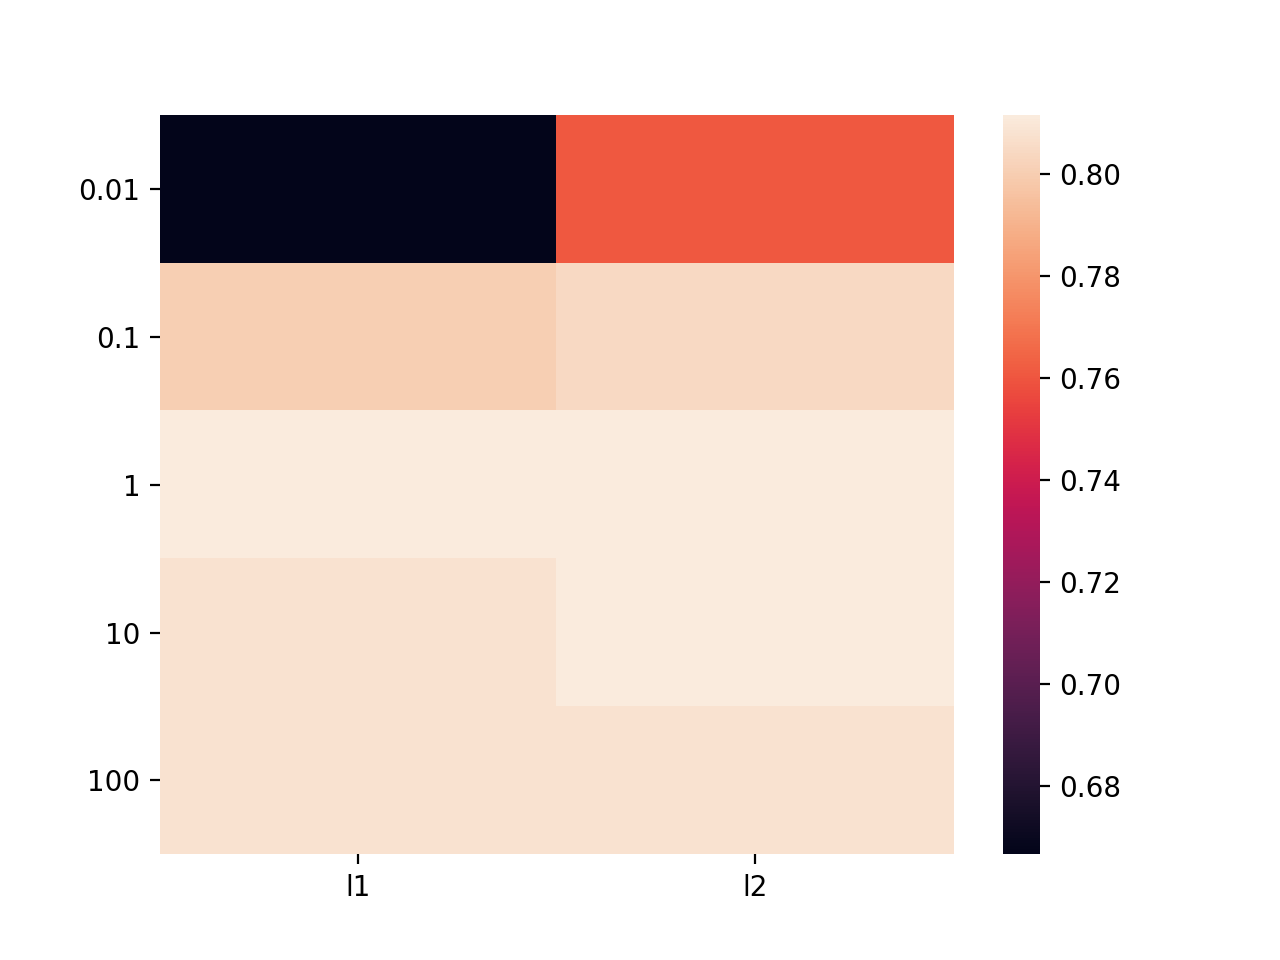

In [14]:
# Use the following function to help visualize results from the grid search
# def GridSearch_Heatmap(scores):
#     %matplotlib notebook
#     import seaborn as sns
#     import matplotlib.pyplot as plt
    
#     plt.figure()
#     sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
#     plt.yticks(rotation=0);

# GridSearch_Heatmap(answer_six())